In [6]:
import datetime
import pandas as pd


class Client:
    """ This Class input Bank's clients.
        
        Attributes:
            client_name (string) represents clients name.
            age (int) represents client's age.
            balance (float) represents client's initially balance.
            client_id (int) represents client identification.
            client_joindate (datetime) represent time when the client account was created with established format Y M D
            client_joindate2 (datetime) represent time when the client account was created in days.
            
        """

    def __init__(self, client_name ="Test", age=0, balance=0,joindate=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),joindate2= datetime.datetime.now()):
        # Lists of clients's data.
        self.client_id = [0]
        self.client_name = [client_name]
        self.age = [age]
        self.balance = [balance]
        self.joindate = [joindate]
        self.joindate2 = [joindate2]
        

        
    def add_client(self,client_name,age,balance,joindate=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),joindate2=datetime.datetime.now()):
        """ Function to add new clients atributes to the Class object.
        
        Attributes:
            client_joindate (datetime) represent time when the client account was created with established format Y M D
            client_joindate2 (datetime) represent time when the client account was created in days.
        
        
        Args:
            client_name (sting): The new client's name
            age (int): the new client's age
            balance (float): The new client's account balance.
            
        Returns:
            None
            
        """        
        
        # Adding plus 1 to the index of client's ID.\n",
        self.client_id.append(self.client_id[-1] + 1)
        
        self.client_name.append(client_name)
        self.age.append(age)
        self.balance.append(balance)
        self.joindate.append(joindate)
        self.joindate2.append(joindate2)
        
    def read_csv(self,file,joindate=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),joindate2=datetime.datetime.now()):
        """Function to add new clients atributes to the Class object through a CSV file without header.
    "        
    "        Attributes:
    "            client_joindate (datetime) represent time when the client account was created with established format Y M D\n",
    "            client_joindate2 (datetime) represent time when the client account was created in days.
    "            data (data) extarcted form the "file" data.
    "        
    "        
    "        Args:
    "            file (csv, data list): A CSV file that contains client_name, age and balance
    "            
    "        Returns:
                    None 
                    """
        # reads the csv file.
        self.data = pd.read_csv(file,header=None)
        
        # Range to calculate client ID from the length of the data set.
        self.client_id = [x for x in range(0,len(self.data))]
        
         # Data from the three columns in the CSV file.
        self.client_name = self.data[0].values.tolist()
        self.age = self.data[1].values.tolist()
        self.balance = self.data[2].values.tolist()
        
        # Set Time the clients were added to the Class.
        self.joindate = [joindate for x in range(len(self.data))]
        self.joindate2 = [joindate2 for x in range(len(self.data))]
        

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression

class Account(Client):
    """Class for manage client's balance, establish different types of clients and accounts, charge and apply interest.\n",
    "        
    "        Attributes
    "            client_name (string) represents clients name.
    "            age (int) represents client's age.
    "            balance (float) represents client's initially balance.
    "            client_id (int) represents client identification.
    "            client_joindate (datetime) represent time when the client account was created with established format Y/M/D.
    "            client_joindate2 (datetime) represent time when the client account was created in days.
    "            account_category (list of strings) represents the kind of account depending on the account time.
    "            client_category (list of strings) represents the type of client depending on their age.
        """
    def __init__(self):
        Client.__init__(self)
        self.account_category = []
        self.client_category = []
        
    def add_balance(self,client_id,balance):
        """  Function to sum new balance to a specific client ID.
    "        
    "        Args:
    "            client_id (int) represents the client identification number.
    "            
    "        Returns:
    "            int: The new client's balance
    "            
    "        """
        if client_id not in range(1,len(self.client_id)):
            return "Clinet_ID do not found, check your client ID again"
        else:
            self.balance[client_id] += balance
    
    def set_client_category(self):
        """  Function to set the client'scategory type depending on their age.
    "        
    "        Args:
    "            None
    "            
    "        Returns:
    "            None
    "            
    "        """
        for i in self.client_id:
            if self.age[i] > 50:
                self.client_category.append("Senior")
            elif self.age[i] <= 25:
                self.client_category.append("Junior")
            else:
                self.client_category.append("Regular")
    def set_account_category(self):
        """  Function to set the account 'scategory type depending on their creation date.
    "        
    "        Args:
    "            None
    "            
    "        Returns:
    "            None
    "            
    "        """
        # Add to the list in order whether their joindate and current date is higher than 300 days as Premium clients.
        for i in self.client_id:
            if (datetime.datetime.now() - self.joindate2[i] ).days > 300:
                self.account_category.append("Premium")
            else:
                self.account_category.append("Standard")
                
    def income_per_month(self,client_id):
        """  Function to return the average of the income per month of a client.
    "        
    "        Args:
    "            client_id (int) represents client identification.
    "            
    "        Returns:
    "            float: The client's balance / month.
    "            
    "        """
        # The difference btween the client's join date and the current date.
        day = datetime.datetime.now()- self.joindate2[client_id]
        
        return self.balance[client_id] / (day.seconds/60)
    
    def interest(self):
        """  Function to calculate the balance's interest based on the account_category.
    "        
    "        Args:
    "            None
    "            
    "        Returns:
    "            None
    "            
    "        """
        self.set_account_category()
        
        # Check for each client account type and add to the balance an interest based on the account_category.
        for i in self.client_id:
            if self.account_category[i] == "Premium":
                self.balance[i] += self.balance[i] * 0.06
            else:
                self.balance[i] += self.balance[i] * 0.03

    def charge(self):
        """  Function to calculate the charges applied on the account based on the client_category.
    "        
    "        Args:
    "            None
    "            
    "        Returns:
    "            None
    "            
    "        """
        self.set_client_category()
        
        # Check for each client client type and charge the balance based on the client_category.
        for i in self.client_id:
            if self.client_category[i] == "Junior":
                self.balance[i] -= 0
            elif self.client_category[i] == "Regular":
                self.balance[i] -= 30
            else:
                self.balance[i] -= 0
                


In [19]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

class Exporter(Account):
    """ Class to create dataframes if clients, export them and create graphs
    "        
    "        Attributes:
    "            client_name (string) represents clients name.
    "            age (int) represents client's age.
    "            balance (float) represents client's initially balance.
    "            client_id (int) represents client identification.
    "            client_joindate (datetime) represent time when the client account was created with established format Y/M/D.
    "            client_joindate2 (datetime) represent time when the client account was created in days.
    "            account_category (list of strings) represents the kind of account depending on the account time.
    "            client_category (list of strings) represents the type of client depending on their age.
    "            
    "         """
    def create_dataframe(self):
        """  Function to create a dataframe from the previously added clients.
    "        
    "        Args:
    "            None
    "            
    "        Returns:
    "            dataframe: A Data Frame containing client's data.
    "            
    "        """
        df = pd.DataFrame([self.client_id,self.client_name,self.age,self.balance,self.joindate,self.client_category,self.account_category]).T
        df.columns = ["client_id","client_name","age","balance","joindate","client_category","account_category"]
        df.index = self.client_id
        return df
        
    def LM(self):
        """  Function to create Linear Regression Model and return a graph containing the Linear model distribution.
    "        
    "        Args:
    "            None
    "            
    "        Returns:
    "            None
    "            
    "        """
        # Use function to create a cleint Data Frame.
        df = self.create_dataframe()
        
        # create a list of predicitons
        predictions= []
        
        # set X and Y axes using the Age and Balance columns from the data frame.
        x = df[["age"]]
        y = df[["balance"]]
        
        # create a Linear Regression Model and fit it with the data.
        model = LinearRegression()
        model.fit(x,y)
        
        # Add to the list of predictions the model balance predictions for each client age.
        for z in self.age:
            predictions.append(model.intercept_ + (model.coef_ * z))
        
        # plot the results.
        plt.scatter(self.age,self.balance)
        plt.plot(np.array(self.age).reshape(-1,1),np.array(predictions).reshape(-1,1), c="r")
        plt.xlabel("Age")
        plt.ylabel("Balance")
        plt.title("Linear Regression AGE vs Salary")
        plt.legend(["Linear Regression","Data"])   
    

In [1620]:
""" class Client:
    def __init__(self,client_id,client_name ,age,balance):
        self.client_id = client_id
        self.client_name = client_name
        self.age = age
        self.balance = balance
        
    def add_client(self,client_name,age):
        self.client_id += 1
        self.client_name = client_name
        self.age = age

    def add_balance(self,balance):
        self.balance += balance"""

' class Client:\n    def __init__(self,client_id,client_name ,age,balance):\n        self.client_id = client_id\n        self.client_name = client_name\n        self.age = age\n        self.balance = balance\n        \n    def add_client(self,client_name,age):\n        self.client_id += 1\n        self.client_name = client_name\n        self.age = age\n\n    def add_balance(self,balance):\n        self.balance += balance'

In [1634]:
acc = Exporter()

In [1635]:
acc.read_csv("C:/Users/bpizzanimendoza/Desktop/Nanodegree/other proj/client_list.csv")

In [1636]:
acc.age

acc.client_id
acc.joindate2

[datetime.datetime(2020, 8, 17, 19, 24, 21, 657287),
 datetime.datetime(2020, 8, 17, 19, 24, 21, 657287),
 datetime.datetime(2020, 8, 17, 19, 24, 21, 657287),
 datetime.datetime(2020, 8, 17, 19, 24, 21, 657287),
 datetime.datetime(2020, 8, 17, 19, 24, 21, 657287),
 datetime.datetime(2020, 8, 17, 19, 24, 21, 657287)]

In [1637]:
acc.client_name

['Bruno', 'Vanessa', 'Franco', 'Cristina', 'David', 'Marta']

In [1638]:
acc.add_client("Bruno",27,9000)
acc.add_client("Franco",30,12000)
acc.add_client("Cris",50,13000)
acc.add_client("Marta",20,7000)
acc.add_client("David",40,20000)


In [1639]:
acc.add_client("Joe",55,20000)

In [1640]:
print(acc.client_name)
print(acc.age)
print(acc.client_id)
print(acc.joindate)
print(acc.balance)

['Bruno', 'Vanessa', 'Franco', 'Cristina', 'David', 'Marta', 'Bruno', 'Franco', 'Cris', 'Marta', 'David', 'Joe']
[27, 30, 31, 56, 46, 22, 27, 30, 50, 20, 40, 55]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
['2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21', '2020-08-17 19:24:21']
[9000, 10000, 14000, 12000, 20000, 4000, 9000, 12000, 13000, 7000, 20000, 20000]


In [1641]:
acc.add_balance(1,20)

In [1642]:
acc.income_per_month(1)

18787.5

In [1643]:
acc.interest()

In [1644]:
acc.charge()

In [1645]:
acc.create_dataframe()

,client_id,client_name,age,balance,joindate,client_category,account_category
0,0,Bruno,27,9240,2020-08-17 19:24:21,Regular,Standard
1,1,Vanessa,30,10290.6,2020-08-17 19:24:21,Regular,Standard
2,2,Franco,31,14390,2020-08-17 19:24:21,Regular,Standard
3,3,Cristina,56,12360,2020-08-17 19:24:21,Senior,Standard
4,4,David,46,20570,2020-08-17 19:24:21,Regular,Standard
5,5,Marta,22,4120,2020-08-17 19:24:21,Junior,Standard
6,6,Bruno,27,9240,2020-08-17 19:24:21,Regular,Standard
7,7,Franco,30,12330,2020-08-17 19:24:21,Regular,Standard
8,8,Cris,50,13360,2020-08-17 19:24:21,Regular,Standard
9,9,Marta,20,7210,2020-08-17 19:24:21,Junior,Standard


In [1646]:
acc.client_id

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

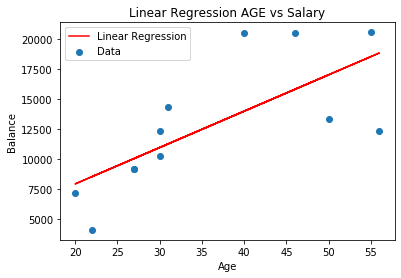

In [1647]:
acc.LM()

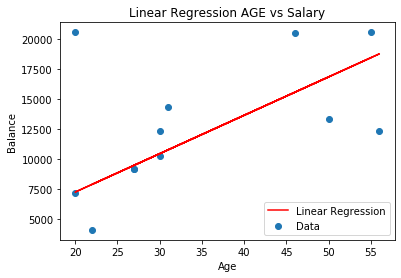

In [1580]:
predictions= []
for z in acc.age:
    predictions.append(model.intercept_ + (model.coef_ * z))
plt.scatter(acc.age,acc.balance)
plt.plot(np.array(acc.age).reshape(-1,1),np.array(predictions).reshape(-1,1),c="r")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Linear Regression AGE vs Salary")
plt.legend(["Linear Regression","Data"])